# Analysis using R in jupyter notebook

#Packages required

In [1]:
library(dplyr)
library(ggplot2)
library(rpart)
library(rpart.plot)
library(pROC)
library(lattice)
library(rattle)
library(ROCR)
library(klaR)
library(caret)
library(pastecs)
library(Boruta)
library(Hmisc)

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'rpart' was built under R version 3.5.2"Warning message:
"package 'rpart.plot' was built under R version 3.5.2"Warning message:
"package 'pROC' was built under R version 3.5.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'lattice' was built under R version 3.5.3"Warning message:
"package 'rattle' was built under R version 3.5.2"Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Warning message

#Reading Data file

In [2]:
wdbc<-read.csv(file="wdbc.csv", header = F,sep=",")
names(wdbc)


[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32"

#The columns were named with the information provided in wdbc.names file

In [3]:
features <- c("radius_", "texture_", "perimeter_", "area_", "smoothness_", "compactness_", "concavity_", "concave_points_", "symmetry_", "fractal_dimension_")
names(wdbc) <- c("ID", "Diagnosis", paste0(features,"mean"), paste0(features,"se"), paste0(features,"worst"))



#Understanding the data

In [5]:
ls(wdbc)
head(wdbc)
tail(wdbc)
str(wdbc)
dim(wdbc)
class(wdbc)
stat.desc(wdbc)

[1] "area_mean"               "area_se"                
 [3] "area_worst"              "compactness_mean"       
 [5] "compactness_se"          "compactness_worst"      
 [7] "concave_points_mean"     "concave_points_se"      
 [9] "concave_points_worst"    "concavity_mean"         
[11] "concavity_se"            "concavity_worst"        
[13] "Diagnosis"               "fractal_dimension_mean" 
[15] "fractal_dimension_se"    "fractal_dimension_worst"
[17] "ID"                      "perimeter_mean"         
[19] "perimeter_se"            "perimeter_worst"        
[21] "radius_mean"             "radius_se"              
[23] "radius_worst"            "smoothness_mean"        
[25] "smoothness_se"           "smoothness_worst"       
[27] "symmetry_mean"           "symmetry_se"            
[29] "symmetry_worst"          "texture_mean"           
[31] "texture_se"              "texture_worst"

ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
566,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
568,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
569,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


'data.frame':	569 obs. of  32 variables:
 $ ID                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ Diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave_points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

[1] 569  32

[1] "data.frame"

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
nbr.val,5.690000e+02,NA,569.0000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,569.0000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
nbr.null,0.000000e+00,NA,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,...,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,NA,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,8.670000e+03,NA,6.9810000,9.710000e+00,4.379000e+01,1.435000e+02,5.263000e-02,1.938000e-02,0.000000e+00,0.000000e+00,...,7.9300000,1.202000e+01,5.041000e+01,1.852000e+02,7.117000e-02,2.729000e-02,0.000000e+00,0.000000e+00,1.565000e-01,5.504000e-02
max,9.113205e+08,NA,28.1100000,3.928000e+01,1.885000e+02,2.501000e+03,1.634000e-01,3.454000e-01,4.268000e-01,2.012000e-01,...,36.0400000,4.954000e+01,2.512000e+02,4.254000e+03,2.226000e-01,1.058000e+00,1.252000e+00,2.910000e-01,6.638000e-01,2.075000e-01
range,9.113118e+08,NA,21.1290000,2.957000e+01,1.447100e+02,2.357500e+03,1.107700e-01,3.260200e-01,4.268000e-01,2.012000e-01,...,28.1100000,3.752000e+01,2.007900e+02,4.068800e+03,1.514300e-01,1.030710e+00,1.252000e+00,2.910000e-01,5.073000e-01,1.524600e-01
sum,1.728157e+10,NA,8038.4290000,1.097581e+04,5.233038e+04,3.726319e+05,5.482900e+01,5.937002e+01,5.052681e+01,2.783499e+01,...,9257.1690000,1.461034e+04,6.103163e+04,5.010518e+05,7.531773e+01,1.446768e+02,1.548752e+02,6.521094e+01,1.650530e+02,4.776517e+01
median,9.060240e+05,NA,13.3700000,1.884000e+01,8.624000e+01,5.511000e+02,9.587000e-02,9.263000e-02,6.154000e-02,3.350000e-02,...,14.9700000,2.541000e+01,9.766000e+01,6.865000e+02,1.313000e-01,2.119000e-01,2.267000e-01,9.993000e-02,2.822000e-01,8.004000e-02
mean,3.037183e+07,NA,14.1272917,1.928965e+01,9.196903e+01,6.548891e+02,9.636028e-02,1.043410e-01,8.879932e-02,4.891915e-02,...,16.2691898,2.567722e+01,1.072612e+02,8.805831e+02,1.323686e-01,2.542650e-01,2.721885e-01,1.146062e-01,2.900756e-01,8.394582e-02
SE.mean,5.241136e+06,NA,0.1477358,1.803088e-01,1.018666e+00,1.475301e+01,5.895989e-04,2.214026e-03,3.342028e-03,1.626700e-03,...,0.2026200,2.576645e-01,1.408692e+00,2.386869e+01,9.571852e-04,6.595889e-03,8.745985e-03,2.755643e-03,2.593619e-03,7.571677e-04


#Checking missing values

In [11]:
sapply(wdbc, function(y) sum(is.na(y)))

ID               Diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                       0 
    concave_points_mean           symmetry_mean  fractal_dimension_mean 
                      0                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave_points_se             symmetry_se 
                      0                       0                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave_points_worst 
                      0                       0                       0 
         symmetry_worst fractal_dimension_worst 
                      0                       0

#Exploratory Analysis
#Proportion of the classes of target variable in the data

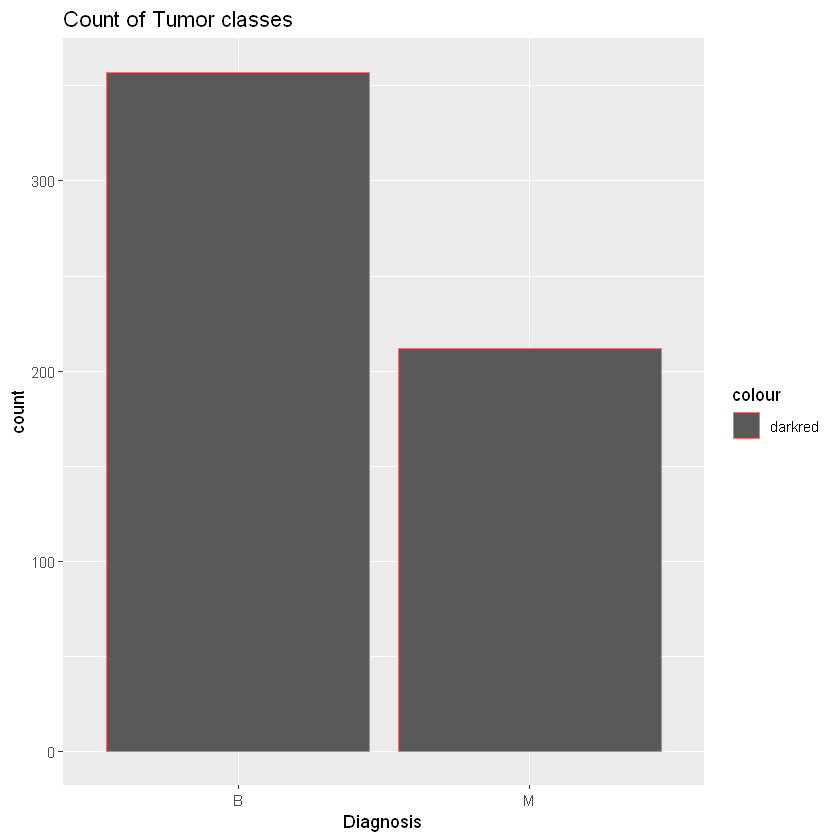

In [12]:
ggplot(data = wdbc) +
  ggtitle("Count of Tumor classes") +
  geom_bar(mapping = aes(x = Diagnosis,color="darkred"))

#Understanding the nature of Benign and Malignant tumours with repect to radius and smoothness

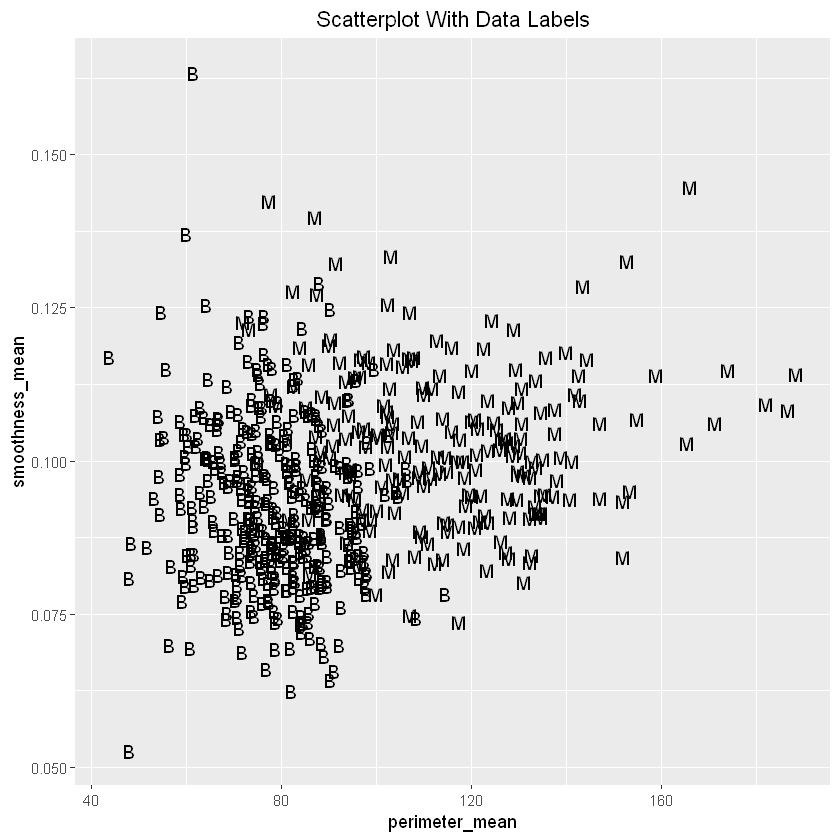

In [13]:
ggplot(wdbc, aes(x = perimeter_mean, y = smoothness_mean)) +
    geom_text(aes(label = Diagnosis), size = 4) +
    ggtitle("Scatterplot With Data Labels") +
    theme(plot.title = element_text(hjust = 0.5))

#Correlation matrix of data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000000,0.323781891,0.997855281,0.987357170,0.17058119,0.50612358,0.67676355,0.82252852,0.14774124,-0.3116308263,...,0.96953897,0.297007644,0.965136514,0.94108246,0.11961614,0.41346282,0.52691146,0.7442142,0.16395333,0.007065886
texture_mean,0.323781891,1.000000000,0.329533059,0.321085696,-0.02338852,0.23670222,0.30241783,0.29346405,0.07140098,-0.0764371834,...,0.35257295,0.912044589,0.358039575,0.34354595,0.07750336,0.27782959,0.30102522,0.2953158,0.10500791,0.119205351
perimeter_mean,0.997855281,0.329533059,1.000000000,0.986506804,0.20727816,0.55693621,0.71613565,0.85097704,0.18302721,-0.2614769081,...,0.96947636,0.303038372,0.970386887,0.94154981,0.15054940,0.45577423,0.56387926,0.7712408,0.18911504,0.051018530
area_mean,0.987357170,0.321085696,0.986506804,1.000000000,0.17702838,0.49850168,0.68598283,0.82326887,0.15129308,-0.2831098117,...,0.96274609,0.287488627,0.959119574,0.95921333,0.12352294,0.39041031,0.51260592,0.7220166,0.14356991,0.003737597
smoothness_mean,0.170581187,-0.023388516,0.207278164,0.177028377,1.00000000,0.65912322,0.52198377,0.55369517,0.55777479,0.5847920019,...,0.21312014,0.036071799,0.238852626,0.20671836,0.80532420,0.47246844,0.43492571,0.5030534,0.39430948,0.499316369
compactness_mean,0.506123578,0.236702222,0.556936211,0.498501682,0.65912322,1.00000000,0.88312067,0.83113504,0.60264105,0.5653686634,...,0.53531540,0.248132833,0.590210428,0.50960381,0.56554117,0.86580904,0.81627525,0.8155732,0.51022343,0.687382323
concavity_mean,0.676763550,0.302417828,0.716135650,0.685982829,0.52198377,0.88312067,1.00000000,0.92139103,0.50066662,0.3367833594,...,0.68823641,0.299878889,0.729564917,0.67598723,0.44882204,0.75496802,0.88410264,0.8613230,0.40946413,0.514929891
concave_points_mean,0.822528522,0.293464051,0.850977041,0.823268869,0.55369517,0.83113504,0.92139103,1.00000000,0.46249739,0.1669173832,...,0.83031763,0.292751713,0.855923128,0.80962962,0.45275305,0.66745368,0.75239950,0.9101553,0.37574415,0.368661134
symmetry_mean,0.147741242,0.071400980,0.183027212,0.151293079,0.55777479,0.60264105,0.50066662,0.46249739,1.00000000,0.4799213301,...,0.18572775,0.090650688,0.219168559,0.17719338,0.42667503,0.47320001,0.43372101,0.4302966,0.69982580,0.438413498
fractal_dimension_mean,-0.311630826,-0.076437183,-0.261476908,-0.283109812,0.58479200,0.56536866,0.33678336,0.16691738,0.47992133,1.0000000000,...,-0.25369149,-0.051269202,-0.205151211,-0.23185445,0.50494208,0.45879816,0.34623388,0.1753254,0.33401868,0.767296779


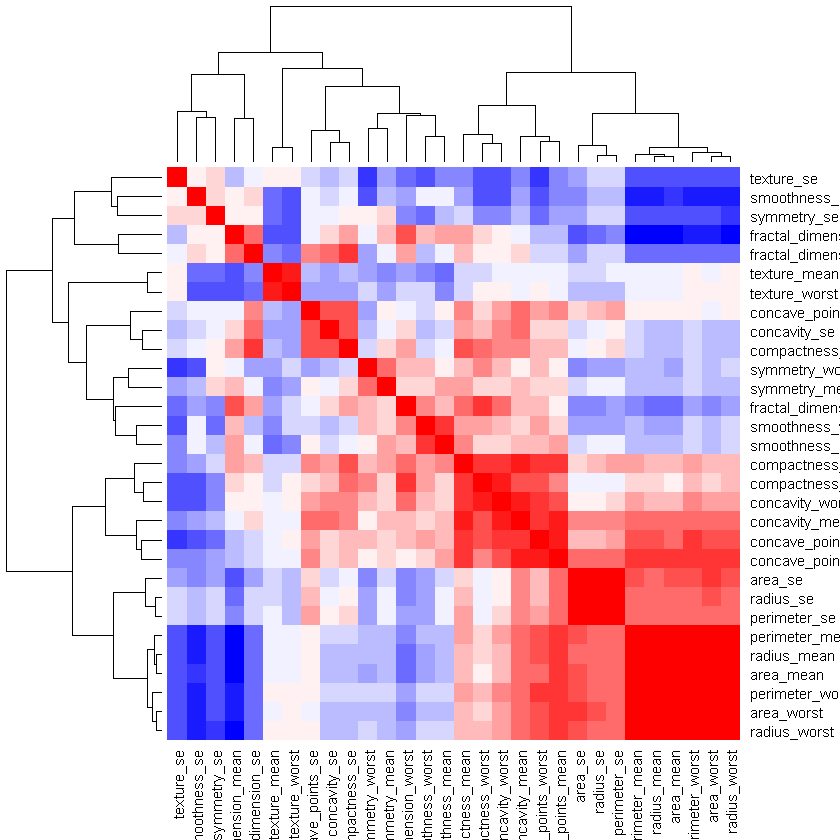

In [14]:
p<-wdbc
p[,1:2] = NULL
res <- cor(p)
round(res, 2)
res
col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res, col = col, symm = TRUE)

## Question 1.Descriptive & summary statistics like mean,median and standard deviation for perimeter

In [15]:
perimeter<-c('perimeter_mean','perimeter_worst')
wdbc_per<-wdbc[perimeter]
stat.desc(wdbc_per)

mean<-apply(wdbc_per[,1:2], 2, mean)
mean
median<-apply(wdbc_per[,1:2], 2, median)
median
standard_deviation<-apply(wdbc_per[,1:2], 2, sd)
standard_deviation

,perimeter_mean,perimeter_worst
nbr.val,5.690000e+02,5.690000e+02
nbr.null,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,0.000000e+00
min,4.379000e+01,5.041000e+01
max,1.885000e+02,2.512000e+02
range,1.447100e+02,2.007900e+02
sum,5.233038e+04,6.103163e+04
median,8.624000e+01,9.766000e+01
mean,9.196903e+01,1.072612e+02
SE.mean,1.018666e+00,1.408692e+00


perimeter_mean perimeter_worst 
       91.96903       107.26121

perimeter_mean perimeter_worst 
          86.24           97.66

perimeter_mean perimeter_worst 
       24.29898        33.60254

#Visualization of summary statistics

 perimeter_mean   perimeter_worst 
 Min.   : 43.79   Min.   : 50.41  
 1st Qu.: 75.17   1st Qu.: 84.11  
 Median : 86.24   Median : 97.66  
 Mean   : 91.97   Mean   :107.26  
 3rd Qu.:104.10   3rd Qu.:125.40  
 Max.   :188.50   Max.   :251.20  

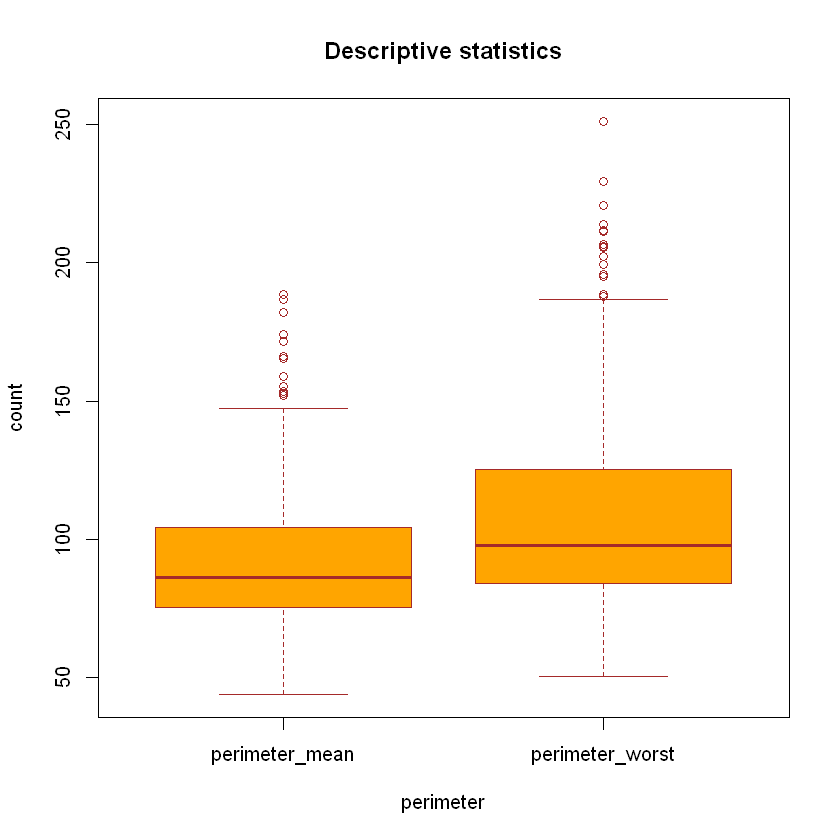

In [16]:
summary<-summary(wdbc_per)
summary
boxplot(wdbc_per,
        main = "Descriptive statistics",
        xlab = "perimeter",
        ylab = "count",
        col = "orange",
        border = "brown",
        notch = FALSE
)

## Question 2.Distribution of variable or feature "radius_mean" in the data

#Checking the Densities 

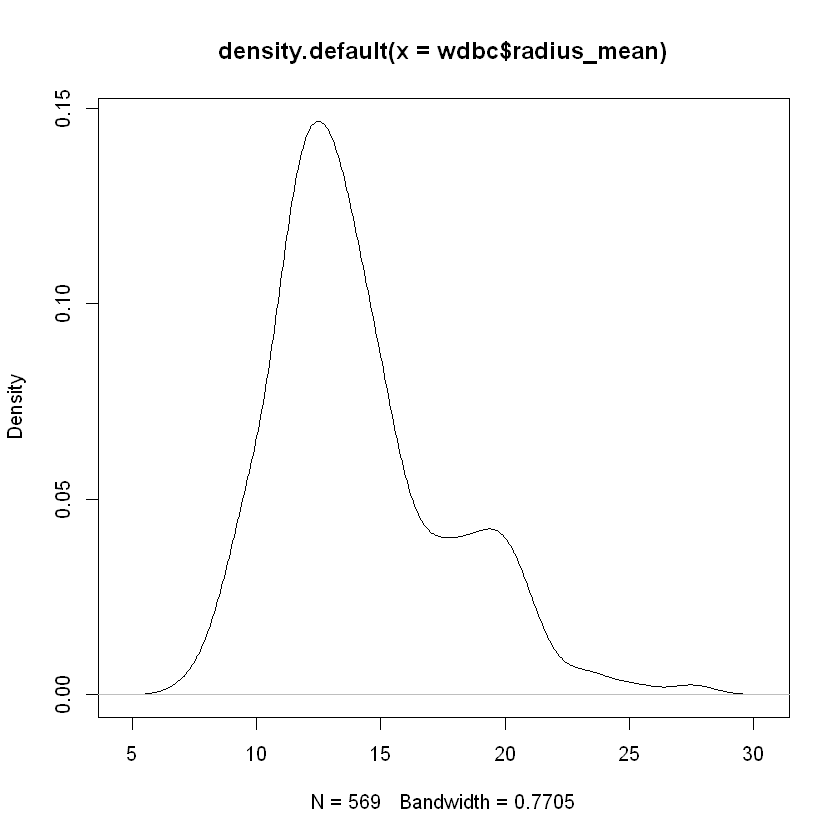

In [17]:
plot(density(wdbc$radius_mean))

#Test for normal distribution

In [19]:
shapiro.test(wdbc$radius_mean)


	Shapiro-Wilk normality test

data:  wdbc$radius_mean
W = 0.94107, p-value = 3.106e-14


#Plot with qqplot

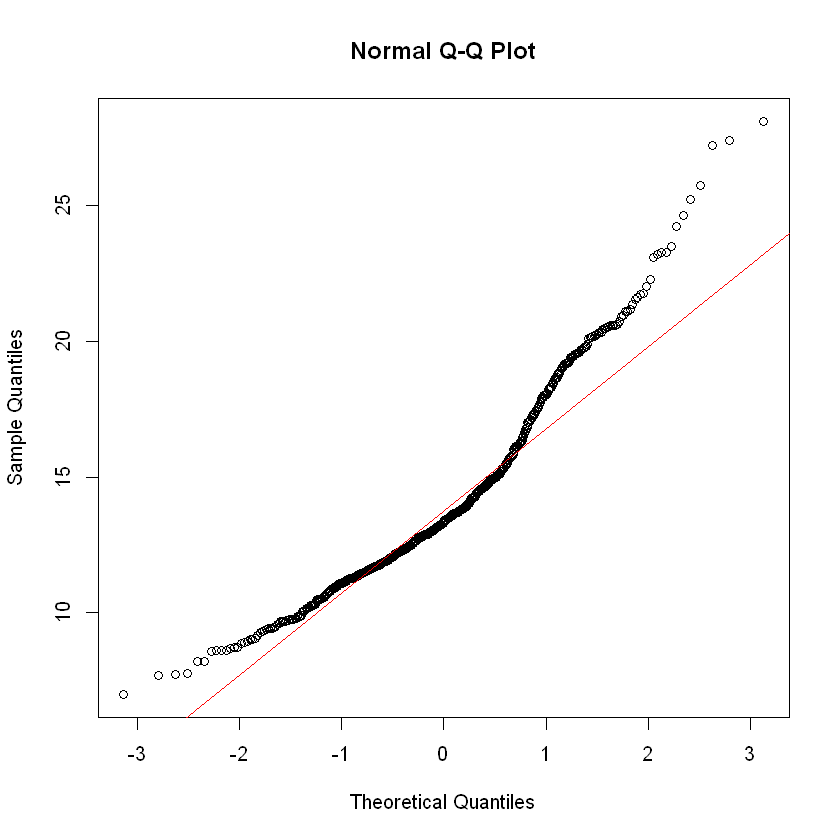

In [20]:
qqnorm(wdbc$radius_mean);qqline(wdbc$radius_mean, col = 2)

#Frequency distribution for Radius Visualization 

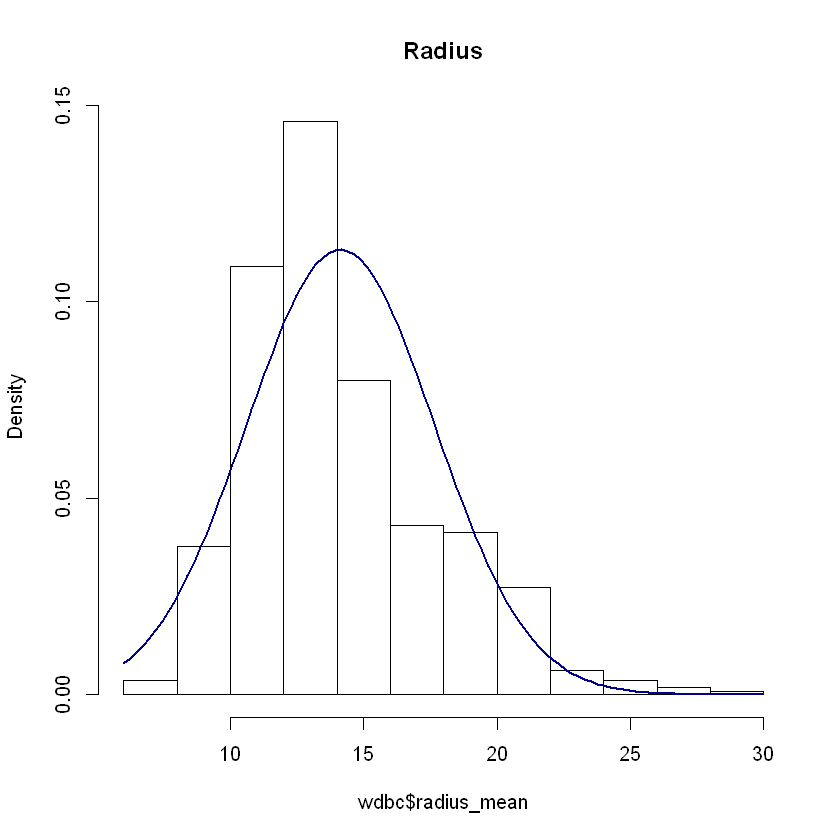

In [21]:
m<-mean(wdbc$radius_mean);std<-sqrt(var(wdbc$radius_mean))
hist(wdbc$radius_mean,prob=T,main="Radius")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)

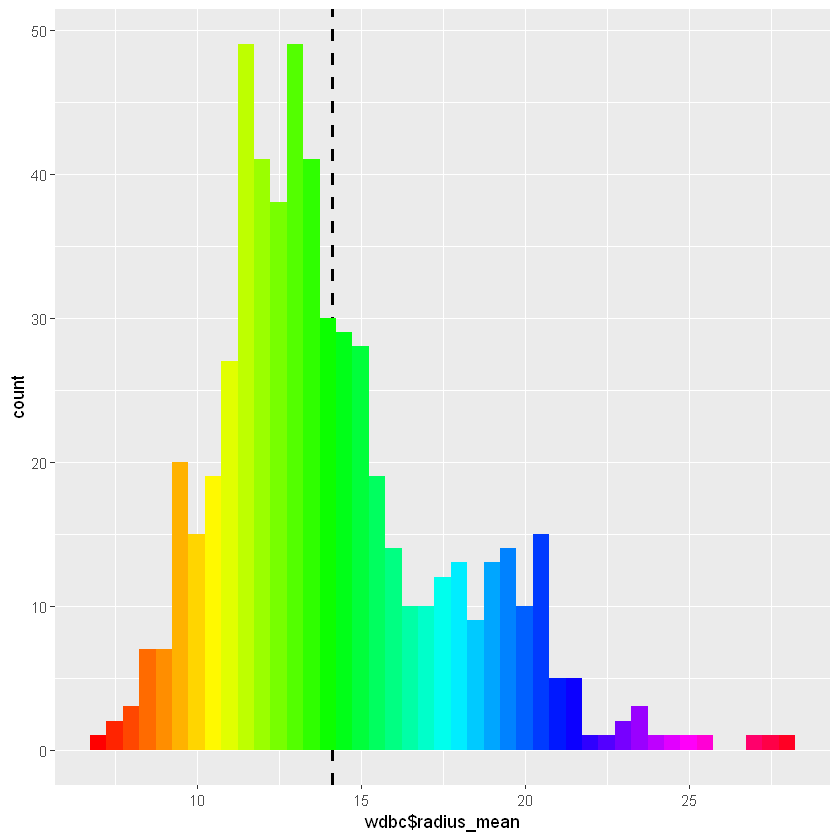

In [22]:
gg_b <- ggplot_build(
  ggplot() + geom_histogram(aes(x = wdbc$radius_mean), binwidth=.5)) 
nu_bins <- dim(gg_b$data[[1]])[1]
ggplot() + geom_vline(aes(xintercept = mean(wdbc$radius_mean)), 
                       linetype = "dashed", size = 1) + geom_histogram(aes(x = wdbc$radius_mean), binwidth=.5, fill = rainbow(nu_bins))


#Since histogram/qqplot returns a long right tail and Shapiro-Wilk normality test results in w value near to 1 while p value is less than 0.05, we can neither reject the null hypothesis nor conisder that it is normally distributed.
#A better approach would be testing for t- distribution by calculating student t test.

## Q3.Train a classifier to predict the diagnosis of malignant or benign


#Feature selection

ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +9.2 secs: 
 confirmed 24 attributes: area_mean, area_se, area_worst, compactness_mean, compactness_se and 19 more;
 still have 6 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
After 20 iterations, +15 secs: 
 confirmed 2 attributes: fractal_dimension_mean, fractal_dimension_se;
 still have 4 attributes left.

 21. run of importance source...
 22. run of 

Boruta performed 99 iterations in 1.097256 mins.
 28 attributes confirmed important: area_mean, area_se, area_worst,
compactness_mean, compactness_se and 23 more;
 No attributes deemed unimportant.
 2 tentative attributes left: smoothness_se, symmetry_se;


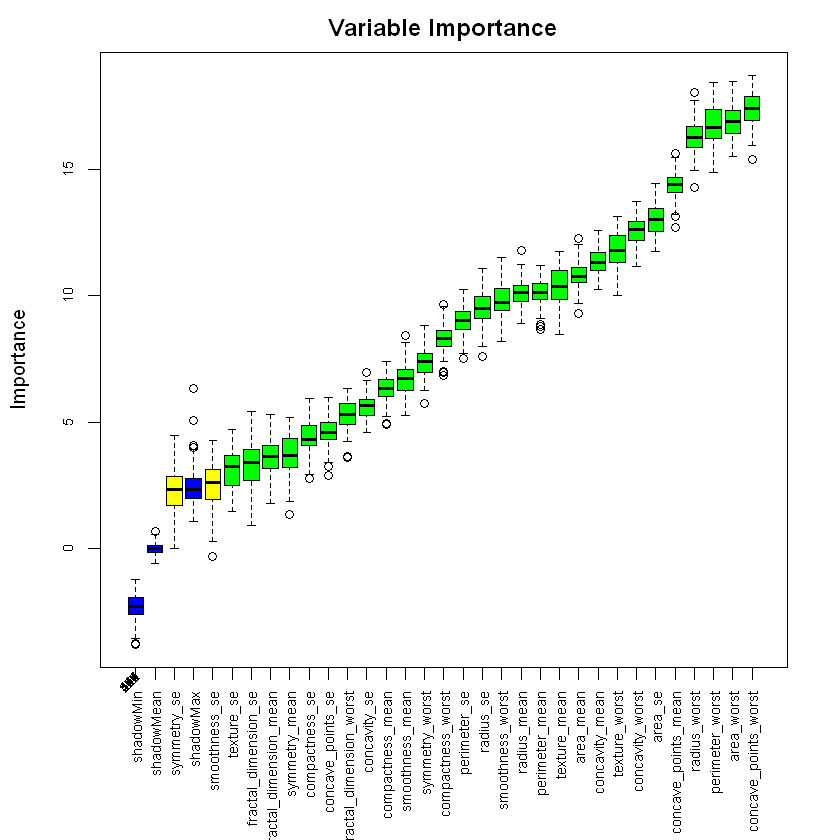

In [23]:
wdbc
wdbc[,1] = NULL
set.seed(456)
boruta_output <- Boruta(Diagnosis ~ ., data=na.omit(wdbc), doTrace=2)
boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])
print(boruta_output)
par(mar = c(7, 4, 2, 2) + 0.2)
plot(boruta_output, cex.axis=.7, las=3, xlab="", main="Variable Importance")
text(par("usr")[3]-0.25, 
     srt = 45, adj= 1, xpd = TRUE,
     labels = paste(rownames(wdbc)), cex=0.65)

#List of variables selected by feature selection based on variable importance

In [24]:
variables<-getSelectedAttributes(boruta_output, withTentative = F)
variables
boruta_df <- attStats(boruta_output)
boruta_df


[1] "radius_mean"             "texture_mean"           
 [3] "perimeter_mean"          "area_mean"              
 [5] "smoothness_mean"         "compactness_mean"       
 [7] "concavity_mean"          "concave_points_mean"    
 [9] "symmetry_mean"           "fractal_dimension_mean" 
[11] "radius_se"               "texture_se"             
[13] "perimeter_se"            "area_se"                
[15] "compactness_se"          "concavity_se"           
[17] "concave_points_se"       "fractal_dimension_se"   
[19] "radius_worst"            "texture_worst"          
[21] "perimeter_worst"         "area_worst"             
[23] "smoothness_worst"        "compactness_worst"      
[25] "concavity_worst"         "concave_points_worst"   
[27] "symmetry_worst"          "fractal_dimension_worst"

,meanImp,medianImp,minImp,maxImp,normHits,decision
radius_mean,10.082107,10.128005,8.88712537,11.802738,1.0000000,Confirmed
texture_mean,10.397338,10.377895,8.46080322,11.749065,1.0000000,Confirmed
perimeter_mean,10.112587,10.138476,8.66533777,11.183261,1.0000000,Confirmed
area_mean,10.823259,10.762864,9.27699591,12.243762,1.0000000,Confirmed
smoothness_mean,6.730766,6.722181,5.25796703,8.444674,0.9898990,Confirmed
compactness_mean,6.308945,6.323571,4.91216954,7.413756,1.0000000,Confirmed
concavity_mean,11.364417,11.308232,10.22350864,12.583804,1.0000000,Confirmed
concave_points_mean,14.350975,14.376361,12.67716710,15.622237,1.0000000,Confirmed
symmetry_mean,3.693023,3.670259,1.34143601,5.183926,0.8484848,Confirmed
fractal_dimension_mean,3.613138,3.627146,1.79500147,5.299470,0.8484848,Confirmed


#Dataset creation eliminating tentative attributes

In [25]:
Cancerdata = subset(wdbc, select = -c(smoothness_se, symmetry_se))
names(Cancerdata)


[1] "Diagnosis"               "radius_mean"            
 [3] "texture_mean"            "perimeter_mean"         
 [5] "area_mean"               "smoothness_mean"        
 [7] "compactness_mean"        "concavity_mean"         
 [9] "concave_points_mean"     "symmetry_mean"          
[11] "fractal_dimension_mean"  "radius_se"              
[13] "texture_se"              "perimeter_se"           
[15] "area_se"                 "compactness_se"         
[17] "concavity_se"            "concave_points_se"      
[19] "fractal_dimension_se"    "radius_worst"           
[21] "texture_worst"           "perimeter_worst"        
[23] "area_worst"              "smoothness_worst"       
[25] "compactness_worst"       "concavity_worst"        
[27] "concave_points_worst"    "symmetry_worst"         
[29] "fractal_dimension_worst"

#Data indexing for randomization

In [27]:
shuffle_index <- sample(1:nrow(wdbc))
head(shuffle_index)
Cancerdata <- Cancerdata[shuffle_index, ]
head(Cancerdata)

[1]  63 291 273 457 138 205

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
356,B,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188
230,M,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.19770,0.3407,0.12430
229,B,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,...,14.20,31.31,90.67,624.0,0.1227,0.3454,0.3911,0.11800,0.2826,0.09585
187,M,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
247,B,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,...,13.94,27.82,88.28,602.0,0.1101,0.1508,0.2298,0.04970,0.2767,0.07198
394,M,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.7053,0.24220,0.3828,0.10070


#Data partitioning to train and validate the model

In [28]:
n = nrow(Cancerdata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = Cancerdata[trainIndex ,]
test = Cancerdata[-trainIndex ,]

#Dimensions

In [29]:
dim(train)
dim(test)

[1] 398  29

[1] 171  29

#To check randomization process

In [30]:
prop.table(table(train$Diagnosis))
prop.table(table(test$Diagnosis))


        B         M 
0.6482412 0.3517588 


        B         M 
0.5789474 0.4210526 

# Building the  Decision tree model for predicting class by training with train data using rpart for ID3 algorithm

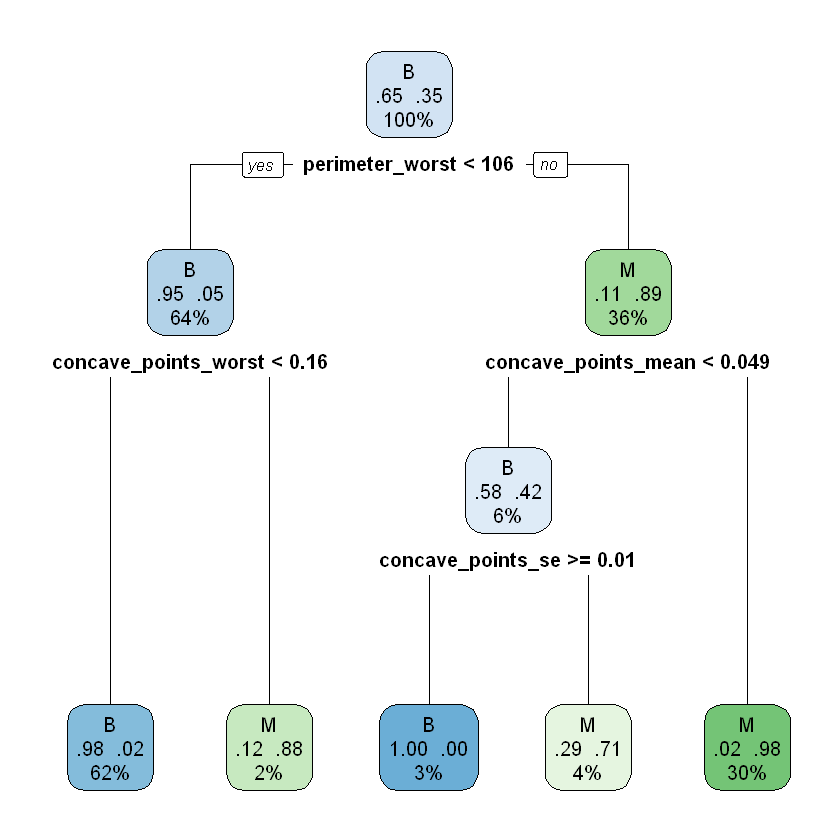

In [31]:
fit <- rpart(Diagnosis~., data = train, method = 'class',
             control = rpart.control(cp = 0))
rpart.plot(fit, extra =104)


#Checking the complexity plot


Classification tree:
rpart(formula = Diagnosis ~ ., data = train, method = "class", 
    control = rpart.control(cp = 0))

Variables actually used in tree construction:
[1] concave_points_mean  concave_points_se    concave_points_worst
[4] perimeter_worst     

Root node error: 140/398 = 0.35176

n= 398 

        CP nsplit rel error  xerror     xstd
1 0.792857      0  1.000000 1.00000 0.068046
2 0.042857      1  0.207143 0.27857 0.042365
3 0.035714      2  0.164286 0.23571 0.039295
4 0.000000      4  0.092857 0.17143 0.033921


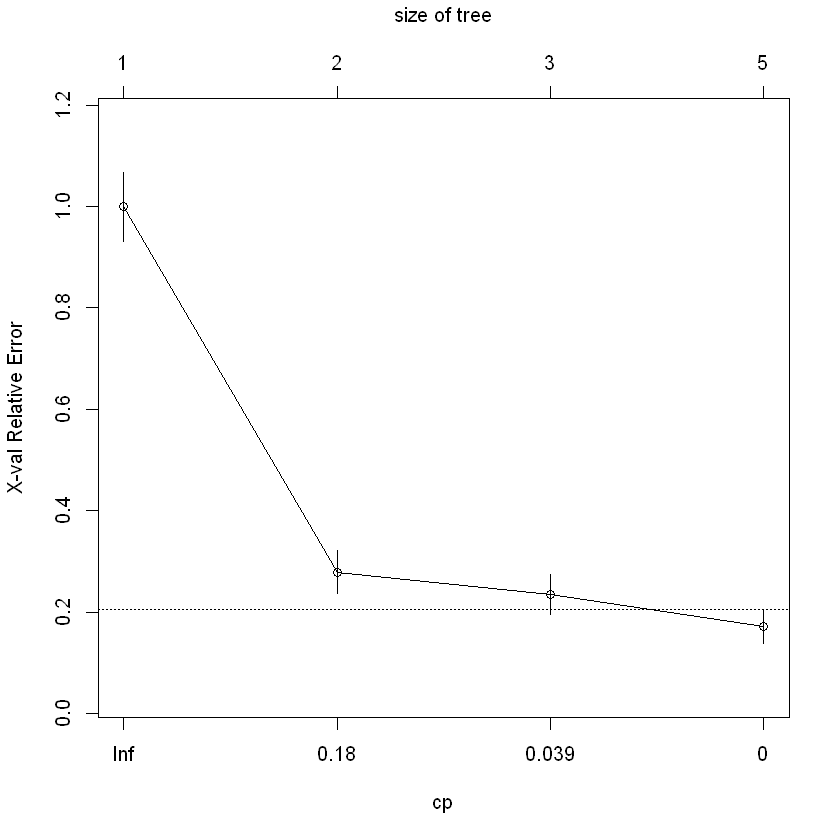

In [32]:
printcp(fit)
plotcp(fit)

#Fancy plot of model

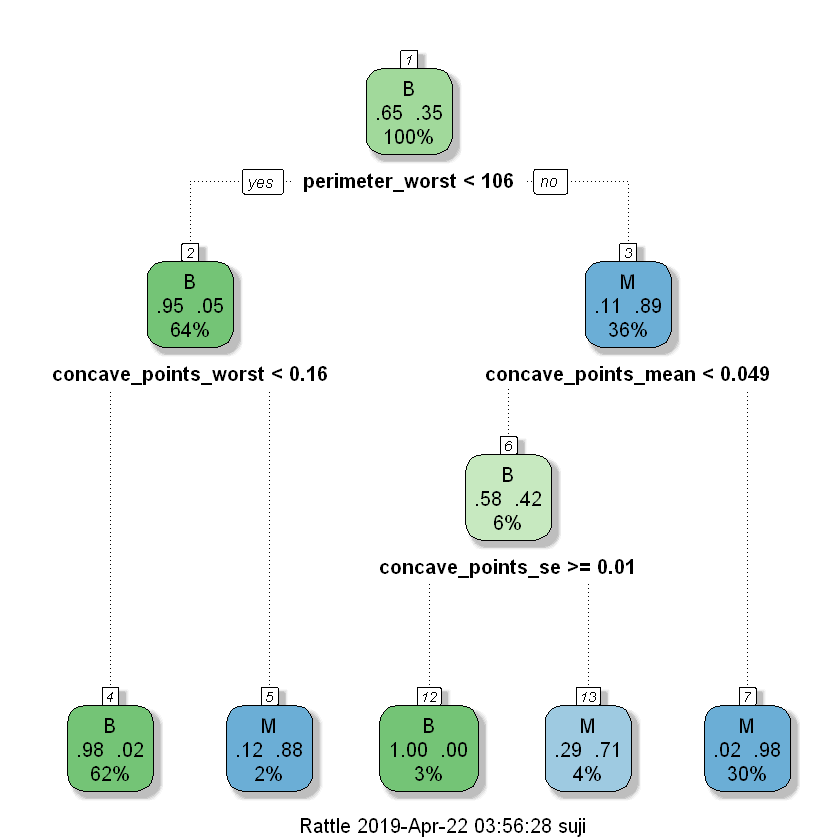

In [33]:
fancyRpartPlot(fit)

#Prediction for test data

In [34]:
predict_test <-predict(fit, test, type = 'class')
confusionMatrix(predict_test,test$Diagnosis )
table_mat <- table(test$Diagnosis, predict_test)

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 89  2
         M 10 70
                                          
               Accuracy : 0.9298          
                 95% CI : (0.8806, 0.9632)
    No Information Rate : 0.5789          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8582          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.8990          
            Specificity : 0.9722          
         Pos Pred Value : 0.9780          
         Neg Pred Value : 0.8750          
             Prevalence : 0.5789          
         Detection Rate : 0.5205          
   Detection Prevalence : 0.5322          
      Balanced Accuracy : 0.9356          
                                          
       'Positive' Class : B               
                                          

#Computing the accuracy test for test data

In [35]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test', accuracy_Test))
DT_accuracy <- mean(predict_test == test$Diagnosis)

[1] "Accuracy for test 0.929824561403509"


#Area under curve

Area under the curve: 0.9525

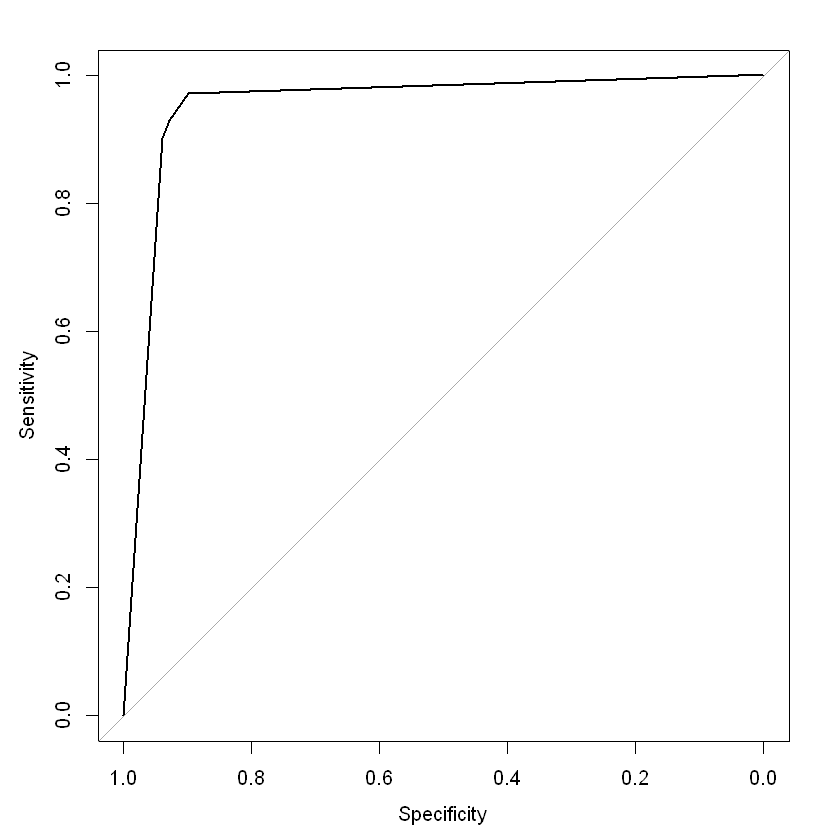

In [36]:
predict_test <-predict(fit, test, type = 'prob')
auc(test$Diagnosis,predict_test[,2])
plot(roc(test$Diagnosis,predict_test[,2]))

#Pruning to improve Decision tree

In [37]:
prune_decison_tree <- rpart(Diagnosis~., data = train, method = 'class', 
                          control = rpart.control(cp = 0, maxdepth = 8,minsplit = 100))

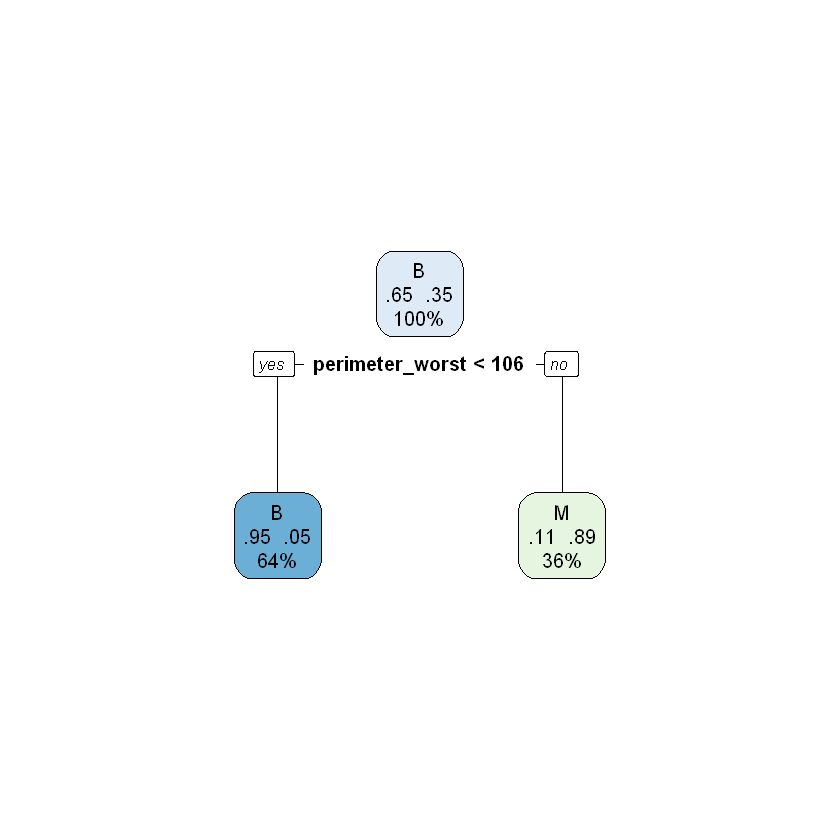

In [38]:
rpart.plot(prune_decison_tree, extra =104)

#Compute the accuracy of the pruned tree

In [39]:
predprune_decison <- predict(prune_decison_tree, test, type = "class")
accuracy_preprun <- mean(predprune_decison== test$Diagnosis)
print(paste('Accuracy for test', accuracy_preprun))

[1] "Accuracy for test 0.900584795321637"


#Prune the fit model based on the optimal cp value

In [40]:
model_pruned <- prune(fit, cp = 0.79)

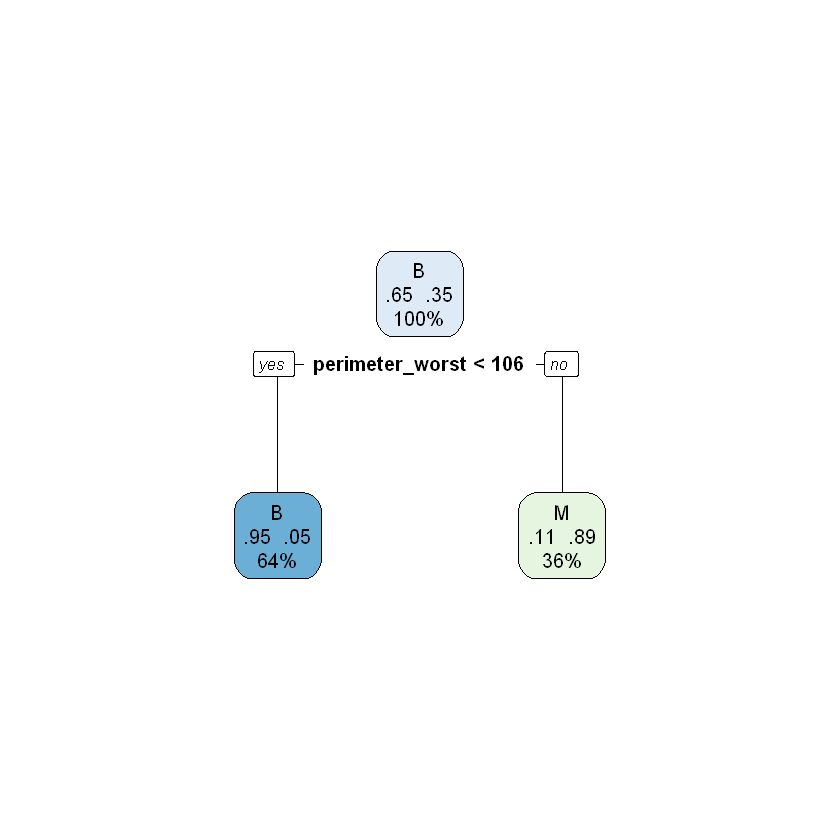

In [41]:
rpart.plot(model_pruned, extra =104)

#Compute the accuracy of the pruned tree

In [42]:
pred_pruned <- predict(model_pruned, test, type = "class")
accuracy_postprun <- mean(pred_pruned == test$Diagnosis)
print(paste('Accuracy for test', accuracy_postprun))
data.frame(DT_accuracy, accuracy_preprun, accuracy_postprun)

[1] "Accuracy for test 0.900584795321637"


DT_accuracy,accuracy_preprun,accuracy_postprun
0.9298246,0.9005848,0.9005848


#Pruning has not improved Decision tree model

# Building the SVM model for classification

#Training with SVM Linear model

In [44]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3,summaryFunction=twoClassSummary,
                       classProbs=TRUE)
levels(train$Diagnosis) <- list(B="0", M="1") 
set.seed(123)
svm_Linear <- train(Diagnosis ~., data = train, method = "svmLinear",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    metric="ROC",
                    tuneLength = 10)
print(svm_Linear)

Support Vector Machines with Linear Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 359, 358, 358, 358, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9908315  0.9897436  0.9428571

Tuning parameter 'C' was held constant at a value of 1


#Prediction for test

In [45]:
test_pred <- predict(svm_Linear, newdata = test)
cm<-confusionMatrix(test_pred, test$Diagnosis )
cm

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 97  1
         M  2 71
                                          
               Accuracy : 0.9825          
                 95% CI : (0.9496, 0.9964)
    No Information Rate : 0.5789          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9641          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9798          
            Specificity : 0.9861          
         Pos Pred Value : 0.9898          
         Neg Pred Value : 0.9726          
             Prevalence : 0.5789          
         Detection Rate : 0.5673          
   Detection Prevalence : 0.5731          
      Balanced Accuracy : 0.9830          
                                          
       'Positive' Class : B               
                                          

In [46]:
Accuracy_SVMLinear <- mean(test_pred == test$Diagnosis)
Accuracy_SVMLinear

[1] 0.9824561

In [47]:
pred <- predict(svm_Linear, newdata = test,type = 'prob')
pred_val <-prediction(pred[,2], test$Diagnosis)
pred_val


An object of class "prediction"
Slot "predictions":
[[1]]
  [1] 9.875801e-01 1.744702e-03 6.389970e-01 2.018621e-04 1.444396e-04
  [6] 9.998896e-01 9.997904e-01 1.082404e-01 9.233541e-03 9.732431e-01
 [11] 1.607585e-02 1.802536e-01 9.999913e-01 1.431452e-02 9.980712e-01
 [16] 1.125552e-05 8.463297e-02 7.429637e-02 9.999728e-01 9.999910e-01
 [21] 2.664447e-05 9.995383e-01 1.000000e+00 9.999871e-01 9.918404e-01
 [26] 9.999962e-01 9.999933e-01 1.565098e-03 9.594373e-01 3.942891e-03
 [31] 9.955358e-01 8.151178e-01 2.129277e-02 9.999650e-01 9.936252e-01
 [36] 3.430695e-03 1.774801e-03 9.999933e-01 6.699596e-03 3.230714e-02
 [41] 1.232010e-03 4.641909e-02 5.947142e-02 9.999392e-01 9.982677e-01
 [46] 9.819355e-01 2.367483e-04 1.000000e+00 1.000000e+00 1.000000e+00
 [51] 9.708269e-01 1.983740e-01 3.654855e-05 2.190917e-03 2.633680e-03
 [56] 9.999984e-01 9.186876e-01 7.442890e-05 1.411787e-02 2.794164e-02
 [61] 3.683470e-03 9.999912e-01 2.325961e-02 3.514819e-02 9.976375e-01
 [66] 2.413730e-03 

#Calculating Area under Curve

Area under the curve: 0.9993

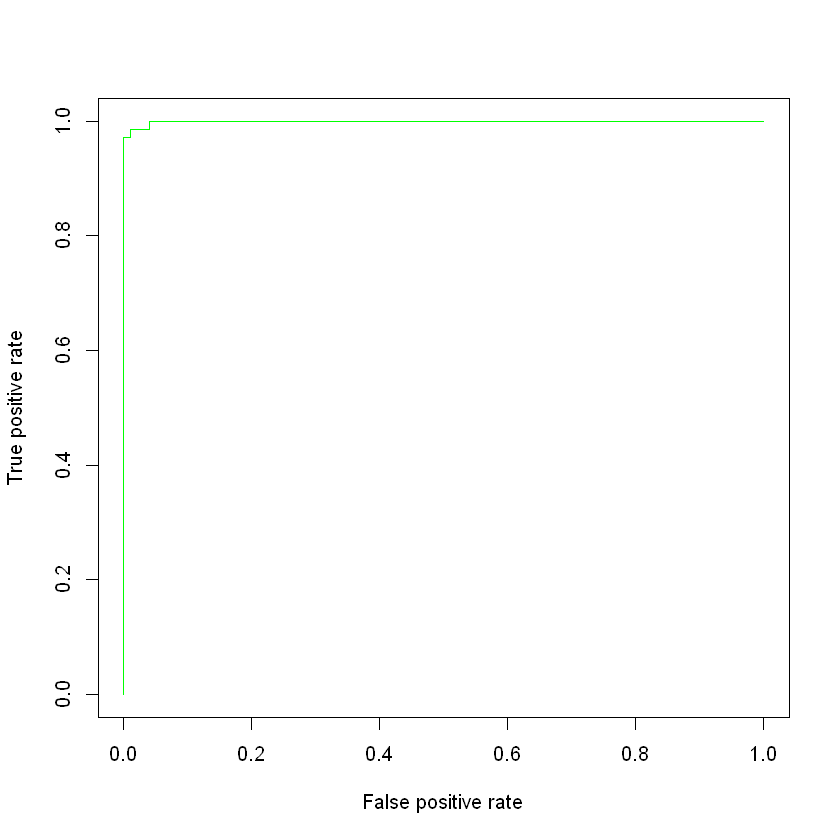

In [48]:
perf_val<-performance(pred_val, "tpr", "fpr")
plot(perf_val, col = "green", lwd = 1.5)
auc(test$Diagnosis,pred[,2])

#Tuning SVM_Linear model by setting grid c value

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message:
"model fit failed for Fold01.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: C=0.00 Error in .local(x, ...) : 
  No Suppo

Support Vector Machines with Linear Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 359, 358, 358, 358, ... 
Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.00  0.5000000        NaN        NaN
  0.01  0.9921868  0.9871282  0.9500000
  0.05  0.9913663  0.9845128  0.9357143
  0.10  0.9916447  0.9871282  0.9500000
  0.25  0.9922015  0.9910256  0.9404762
  0.50  0.9916484  0.9897436  0.9452381
  0.75  0.9908278  0.9884615  0.9452381
  1.00  0.9908315  0.9897436  0.9285714
  1.25  0.9903700  0.9897436  0.9333333
  1.50  0.9901832  0.9897436  0.9357143
  1.75  0.9899927  0.9897436  0.9380952
  2.00  0.9898132  0.9897436  0.9285714
  5.00  0.9886154  0.9935897  0.9142857

ROC was used to select the optimal model using the largest value.
The final value used for the model was C = 0.25.

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 99  2
         M  0 70
                                          
               Accuracy : 0.9883          
                 95% CI : (0.9584, 0.9986)
    No Information Rate : 0.5789          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9759          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9722          
         Pos Pred Value : 0.9802          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5789          
         Detection Rate : 0.5789          
   Detection Prevalence : 0.5906          
      Balanced Accuracy : 0.9861          
                                          
       'Positive' Class : B               
                                          

[1] 0.9883041

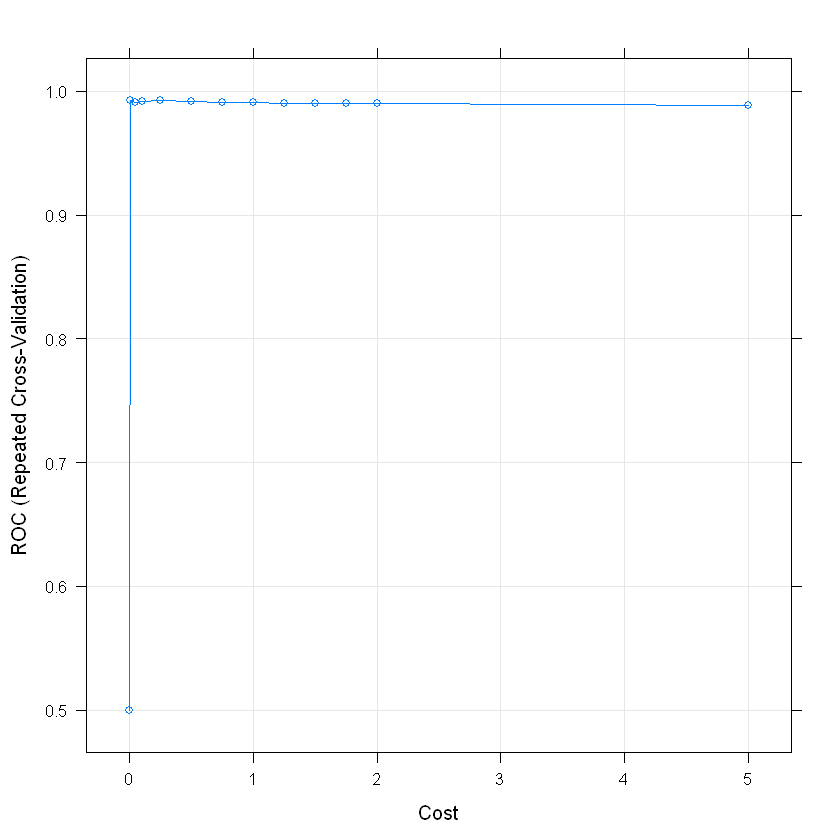

In [49]:
grid <- expand.grid(C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,5))
set.seed(123)
svm_Linear_Grid <- train(Diagnosis ~., data = train, method = "svmLinear",
                           trControl=trctrl,
                           preProcess = c("center", "scale"),
                           tuneGrid = grid,
                           tuneLength = 10)
svm_Linear_Grid
plot(svm_Linear_Grid)
test_pred_grid <- predict(svm_Linear_Grid, newdata = test)
confusionMatrix(test_pred_grid, test$Diagnosis)
Accuracy_SVMLinearGrid <- mean(test_pred_grid == test$Diagnosis)
Accuracy_SVMLinearGrid

#SVM Classifier using Non-Linear Kernel

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

Support Vector Machines with Radial Basis Function Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 359, 358, 358, 358, ... 
Resampling results across tuning parameters:

  C       ROC        Sens       Spec     
    0.25  0.9873919  0.9639487  0.9166667
    0.50  0.9904286  0.9742051  0.9452381
    1.00  0.9915275  0.9704103  0.9452381
    2.00  0.9930183  0.9704103  0.9547619
    4.00  0.9929304  0.9691795  0.9523810
    8.00  0.9925641  0.9678974  0.9476190
   16.00  0.9898938  0.9601538  0.9428571
   32.00  0.9881538  0.9601538  0.9285714
   64.00  0.9860256  0.9600513  0.9214286
  128.00  0.9860256  0.9536410  0.9238095

Tuning parameter 'sigma' was held constant at a value of 0.04742502
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04742502 and C = 2.

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 96  1
         M  3 71
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9412, 0.9936)
    No Information Rate : 0.5789          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9522          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9697          
            Specificity : 0.9861          
         Pos Pred Value : 0.9897          
         Neg Pred Value : 0.9595          
             Prevalence : 0.5789          
         Detection Rate : 0.5614          
   Detection Prevalence : 0.5673          
      Balanced Accuracy : 0.9779          
                                          
       'Positive' Class : B               
                                          

[1] 0.9766082

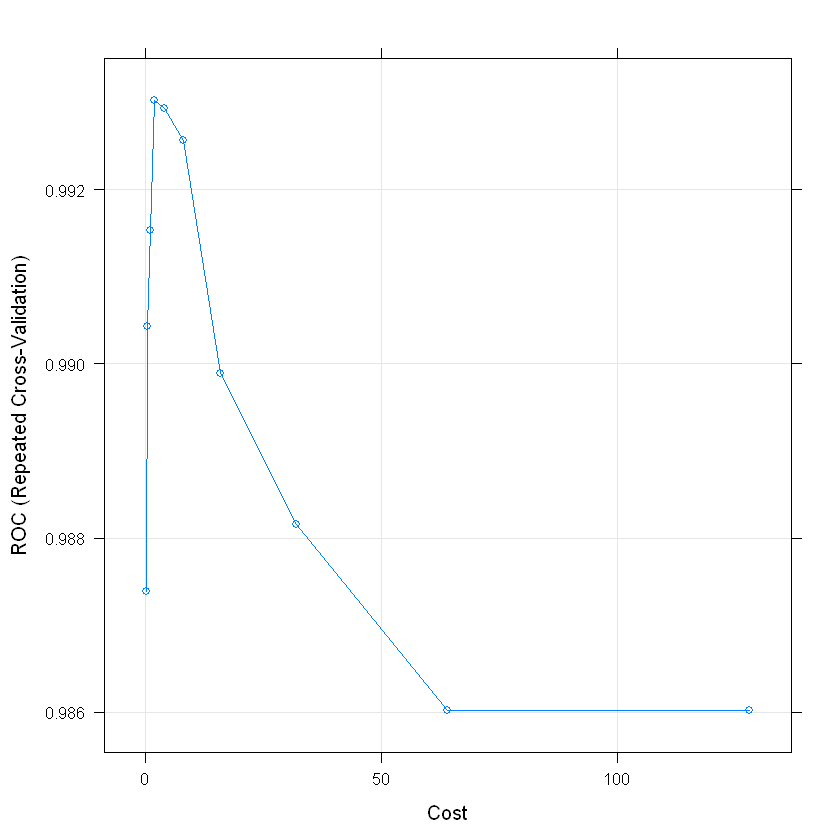

In [50]:
set.seed(123)
svm_Radial <- train(Diagnosis ~., data = train, method = "svmRadial",
                      trControl=trctrl,
                      preProcess = c("center", "scale"),
                      tuneLength = 10)
svm_Radial
test_pred_Radial <- predict(svm_Radial, newdata = test)
confusionMatrix(test_pred_Radial, test$Diagnosis )
plot(svm_Radial)
Accuracy_SVMRadial <- mean(test_pred_Radial == test$Diagnosis)
Accuracy_SVMRadial

#Tuning SVM_Radial model by setting grid c value

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message:
"model fit failed for Fold01.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit fai

maximum number of iterations reached 0.002147873 0.002095775maximum number of iterations reached 0.005815287 0.005524376maximum number of iterations reached 0.008038292 0.007565558maximum number of iterations reached 1.124538e-05 1.083639e-05maximum number of iterations reached 0.001548895 0.001474516

Warning message:
"model fit failed for Fold02.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001982255 0.001917438maximum number of iterations reached 0.006443505 0.006095284maximum number of iterations reached 0.007577509 0.007184324maximum number of iterations reached 1.207137e-05 1.167548e-05

Warning message:
"model fit failed for Fold03.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001465577 0.001432723maximum number of iterations reached 0.005582421 0.005295174maximum number of iterations reached 0.00701605 0.006566435maximum number of iterations reached 0.0001365675 0.0001311749maximum number of iterations reached 3.627038e-05 3.50295e-05maximum number of iterations reached 6.425368e-05 5.991213e-05

Warning message:
"model fit failed for Fold04.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001012049 0.0009887404maximum number of iterations reached 0.005569296 0.005325587maximum number of iterations reached 0.007466016 0.007037839maximum number of iterations reached 0.0002831186 0.0002722308

Warning message:
"model fit failed for Fold05.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001142255 0.001115484maximum number of iterations reached 0.005430136 0.005177599maximum number of iterations reached 0.007604588 0.007157192maximum number of iterations reached 0.0003237354 0.0003112626

Warning message:
"model fit failed for Fold06.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001192693 0.001160455maximum number of iterations reached 0.004864203 0.004635107maximum number of iterations reached 0.007181045 0.006806305maximum number of iterations reached 0.0002009653 0.000193385

Warning message:
"model fit failed for Fold07.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.00181981 0.001766431maximum number of iterations reached 0.005154353 0.004889596maximum number of iterations reached 0.007210788 0.006754065maximum number of iterations reached 0.0003966153 0.0003799413

Warning message:
"model fit failed for Fold08.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001200258 0.001166586maximum number of iterations reached 0.006508821 0.006190706maximum number of iterations reached 0.006831983 0.006442501maximum number of iterations reached 0.0009485714 0.000903552

Warning message:
"model fit failed for Fold09.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0008953561 0.0008741292maximum number of iterations reached 0.004482164 0.004283551maximum number of iterations reached 0.007190197 0.006770225maximum number of iterations reached 0.0001141773 0.0001099608

Warning message:
"model fit failed for Fold10.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0005059241 0.0004967265maximum number of iterations reached 0.006178747 0.005855451maximum number of iterations reached 0.00722338 0.006792928maximum number of iterations reached 0.0003657349 0.0003502667

Warning message:
"model fit failed for Fold01.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.000577594 0.0005662406maximum number of iterations reached 0.004624492 0.004383172maximum number of iterations reached 0.008092218 0.007571078maximum number of iterations reached 4.405698e-05 4.254808e-05

Warning message:
"model fit failed for Fold02.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001626457 0.001580412maximum number of iterations reached 0.005425969 0.005176764maximum number of iterations reached 0.007479007 0.007068885maximum number of iterations reached 9.626634e-05 9.279422e-05

Warning message:
"model fit failed for Fold03.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001494461 0.001454645maximum number of iterations reached 0.006115075 0.005793871maximum number of iterations reached 0.007519989 0.007116853maximum number of iterations reached 0.001508532 0.001428063

Warning message:
"model fit failed for Fold04.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0002641297 0.0002598921maximum number of iterations reached 0.005105562 0.004877277maximum number of iterations reached 0.006726126 0.006326677maximum number of iterations reached 8.544467e-05 8.241806e-05

Warning message:
"model fit failed for Fold05.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001465496 0.001425483maximum number of iterations reached 0.005807479 0.005481304maximum number of iterations reached 0.007311914 0.006851129maximum number of iterations reached 6.185013e-05 5.969825e-05

Warning message:
"model fit failed for Fold06.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0005044799 0.0004947777maximum number of iterations reached 0.004860344 0.004602057maximum number of iterations reached 0.007206826 0.006750251maximum number of iterations reached 8.70365e-05 8.387107e-05

Warning message:
"model fit failed for Fold07.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001457165 0.001415921maximum number of iterations reached 0.005407985 0.005138088maximum number of iterations reached 0.007354766 0.006883307maximum number of iterations reached 0.0006098007 0.0005836074

Warning message:
"model fit failed for Fold08.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.002261164 0.002199971maximum number of iterations reached 0.005014982 0.004771499maximum number of iterations reached 0.008039593 0.007570083maximum number of iterations reached 0.0001966664 0.000189275

Warning message:
"model fit failed for Fold09.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.00226862 0.002212226maximum number of iterations reached 0.00508838 0.004853377maximum number of iterations reached 0.008128312 0.007648259maximum number of iterations reached 3.36693e-05 3.243464e-05maximum number of iterations reached 0.00166484 0.001577523

Warning message:
"model fit failed for Fold10.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001702574 0.001652694maximum number of iterations reached 0.006770391 0.006447593maximum number of iterations reached 0.006907266 0.006493471maximum number of iterations reached 0.0002647789 0.0002545758

Warning message:
"model fit failed for Fold01.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001419262 0.001382441maximum number of iterations reached 0.005630729 0.005354161maximum number of iterations reached 0.00787027 0.007414182maximum number of iterations reached 8.963696e-05 8.637701e-05

Warning message:
"model fit failed for Fold02.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001123036 0.001092674maximum number of iterations reached 0.004422459 0.004257473maximum number of iterations reached 0.007656494 0.007212975maximum number of iterations reached 8.135368e-05 7.846437e-05

Warning message:
"model fit failed for Fold03.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0006314416 0.0006207632maximum number of iterations reached 0.003566575 0.003406123maximum number of iterations reached 0.00701635 0.006618315maximum number of iterations reached 0.0003242965 0.0003111146

Warning message:
"model fit failed for Fold04.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0003808786 0.0003745301maximum number of iterations reached 0.005826297 0.005516044maximum number of iterations reached 0.007557133 0.007053832maximum number of iterations reached 0.0007680217 0.0007311188

Warning message:
"model fit failed for Fold05.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001657078 0.001614283maximum number of iterations reached 0.006321508 0.006011984maximum number of iterations reached 0.007858868 0.007418705maximum number of iterations reached 1.368353e-05 1.318447e-05maximum number of iterations reached 0.0004606763 0.0004403485

Warning message:
"model fit failed for Fold06.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.00137756 0.001344234maximum number of iterations reached 0.005103308 0.004833675maximum number of iterations reached 0.006602654 0.006224674maximum number of iterations reached 1.626731e-05 1.57223e-05

Warning message:
"model fit failed for Fold07.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001419349 0.001386373maximum number of iterations reached 0.006386967 0.006087498maximum number of iterations reached 0.006744205 0.006372342maximum number of iterations reached 0.0001079544 0.000104091

Warning message:
"model fit failed for Fold08.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001645079 0.001604008maximum number of iterations reached 0.006162556 0.005881722maximum number of iterations reached 0.007890511 0.007449712maximum number of iterations reached 3.68738e-05 3.551906e-05maximum number of iterations reached 0.000318767 0.0003059601

Warning message:
"model fit failed for Fold09.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0004088508 0.0004015456maximum number of iterations reached 0.005173366 0.004921693maximum number of iterations reached 0.007072537 0.006665817maximum number of iterations reached 3.493792e-05 3.375487e-05

Warning message:
"model fit failed for Fold10.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001158292 0.001126648maximum number of iterations reached 0.004424118 0.004212216maximum number of iterations reached 0.008105574 0.007630604maximum number of iterations reached 7.06978e-05 6.802464e-05maximum number of iterations reached 0.001497007 0.001415613

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 96  1
         M  3 71
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9412, 0.9936)
    No Information Rate : 0.5789          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9522          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9697          
            Specificity : 0.9861          
         Pos Pred Value : 0.9897          
         Neg Pred Value : 0.9595          
             Prevalence : 0.5789          
         Detection Rate : 0.5614          
   Detection Prevalence : 0.5673          
      Balanced Accuracy : 0.9779          
                                          
       'Positive' Class : B               
                                          

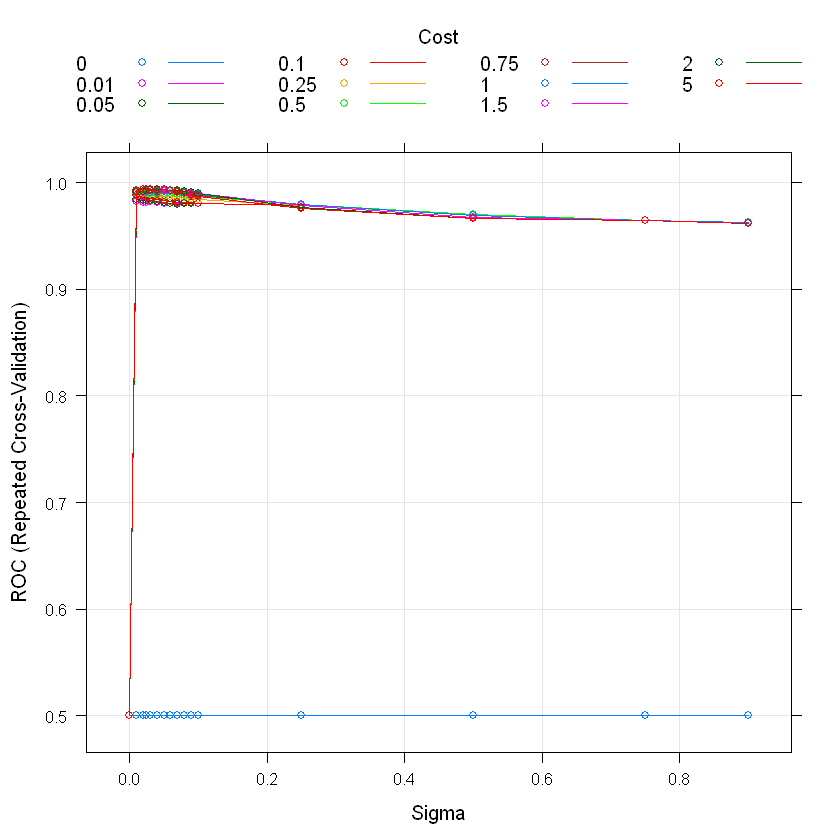

In [51]:
grid_radial <- expand.grid(sigma = c(0,0.01, 0.02, 0.025, 0.03, 0.04,
                                     0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.25, 0.5, 0.75,0.9),
                           C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
                                 1, 1.5, 2,5))
set.seed(123)
svm_Radial_Grid <- train(Diagnosis~., data = train, method = "svmRadial",
                           trControl=trctrl,
                           preProcess = c("center", "scale"),
                           tuneGrid = grid_radial,
                           tuneLength = 10)
test_pred_Radial_Grid <- predict(svm_Radial_Grid, newdata = test)
confusionMatrix(test_pred_Radial_Grid, test$Diagnosis )
plot(svm_Radial_Grid)
Accuracy_SVMRadialGrid <- mean(test_pred_Radial_Grid == test$Diagnosis)

In [52]:
data.frame(Accuracy_SVMLinear, Accuracy_SVMLinearGrid, Accuracy_SVMRadial,Accuracy_SVMRadialGrid)

Accuracy_SVMLinear,Accuracy_SVMLinearGrid,Accuracy_SVMRadial,Accuracy_SVMRadialGrid
0.9824561,0.9883041,0.9766082,0.9766082


#SVM model performed better than other models with good Accuracy and highest Area under curve.
